<a href="https://colab.research.google.com/github/Tajikana/ml/blob/main/first_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First ml project**

# load data

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

# **Data prep**

## data seperation

In [ ]:
y=df["logS"]
y

In [ ]:
x=df.drop("logS", axis=1)
x

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=100)
X_train


# model

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

### applying model

In [22]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)


### model performance

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2=r2_score(y_test, y_lr_test_pred)



In [25]:
print("LR MSE (Train): ", lr_train_mse)
print("LR r2 (Train): ", lr_train_r2)

print("LR MSE (Test): ", lr_test_mse)
print("LR r2 (Test): ", lr_test_r2)

LR MSE (Train):  1.0211498324104205
LR r2 (Train):  0.7626677120764102
LR MSE (Test):  0.9785998335638344
LR r2 (Test):  0.7898615027327966


In [32]:
lr_results=pd.DataFrame(["Linear regressin", lr_train_mse, lr_train_r2, lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=["method","training mse","training r2","test mse","test r2"]
lr_results

,method,training mse,training r2,test mse,test r2
0,Linear regressin,1.02115,0.762668,0.9786,0.789862


## Random forest



### train model


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### apllying model

In [36]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

### performance

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2=r2_score(y_test, y_rf_test_pred)



In [39]:
rf_results=pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=["method","training mse","training r2","test mse","test r2"]
rf_results

,method,training mse,training r2,test mse,test r2
0,Random Forest,1.004799,0.766468,1.308167,0.719092


## **model comparison**

In [47]:
df_models=pd.concat([lr_results,rf_results],axis=0)
df_models.reset_index(drop=True)

,method,training mse,training r2,test mse,test r2
0,Linear regressin,1.02115,0.762668,0.9786,0.789862
1,Random Forest,1.004799,0.766468,1.308167,0.719092


## data visulaization

Text(0.5, 0, 'Experimental logS')

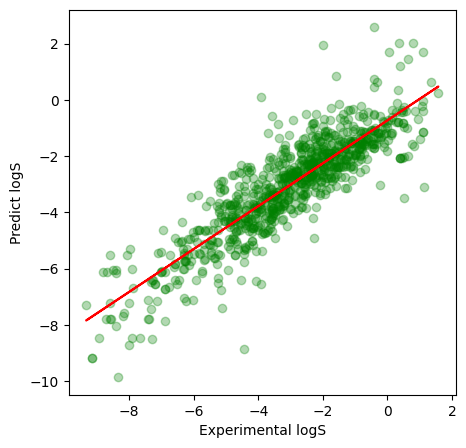

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="green",alpha=0.3)

z=np.polyfit(y_train, y_lr_train_pred, 1)
p=np.poly1d(z)

plt.plot(y_train,p(y_train),"red")
plt.ylabel("Predict logS")
plt.xlabel("Experimental logS")